# Figure 2

In [85]:
import stylia
import numpy as np
import matplotlib.pyplot as plt
from stylia import TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH
import pandas as pd

## Search aggregates

In [86]:
df = pd.read_csv("../results/cheese_search_aggregate.csv")

In [87]:
df

,database,category,search_type,counts,mean,std,median,perc_25,perc_75,min,max
0,zinc15,natural,consensus,65425,0.462538,0.159812,0.440678,0.345238,0.557895,0.157534,1.000000
1,zinc15,natural,morgan,64477,0.446256,0.166555,0.417722,0.322581,0.550000,0.146552,1.000000
2,zinc15,natural,espsim_shape,65671,0.391521,0.166442,0.363636,0.263889,0.474359,0.111111,1.000000
3,zinc15,natural,espsim_electrostatic,63409,0.406751,0.171047,0.381818,0.272727,0.500000,0.120000,1.000000
4,zinc15,synthetic,consensus,51497,0.455759,0.136880,0.444444,0.357143,0.538462,0.142857,1.000000
5,zinc15,synthetic,morgan,49877,0.439105,0.142442,0.424242,0.333333,0.525424,0.090909,1.000000
6,zinc15,synthetic,espsim_shape,50740,0.371522,0.142682,0.344828,0.270270,0.444444,0.119318,1.000000
7,zinc15,synthetic,espsim_electrostatic,49770,0.379907,0.149595,0.355932,0.268293,0.459459,0.097222,1.000000
8,zinc15,both,consensus,2910,0.520582,0.170279,0.488372,0.375000,0.657534,0.237037,1.000000
9,zinc15,both,morgan,2715,0.528980,0.170074,0.518519,0.375000,0.657895,0.219697,1.000000


In [88]:
def sum_counts(df):
    s = np.sum(df["counts"])
    return s

def analyze_counts(df):
    df_syn = df[df["category"] == "synthetic"]
    df_nat = df[df["category"] == "natural"]
    df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
    df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
    znc_in_syn = sum_counts(df_znc_syn)/sum_counts(df_syn)
    znc_in_nat = sum_counts(df_znc_nat)/sum_counts(df_syn)
    print(f"ZINC15 in synthetic: {znc_in_syn}")
    print(f"ZINC15 in natural: {znc_in_nat}")

analyze_counts(df)
analyze_counts(df[df["search_type"] == "espsim_electrostatic"])


ZINC15 in synthetic: 0.7705496183206106
ZINC15 in natural: 0.9884809160305343
ZINC15 in synthetic: 0.7598473282442748
ZINC15 in natural: 0.9680763358778626


        database category           search_type  counts      mean       std  \
12  enamine-real  natural             consensus    7975  0.392366  0.147735   
13  enamine-real  natural                morgan    8923  0.355329  0.140319   
14  enamine-real  natural          espsim_shape    7729  0.288329  0.115495   
15  enamine-real  natural  espsim_electrostatic    9991  0.320004  0.138088   

      median   perc_25   perc_75       min  max  
12  0.352113  0.271429  0.486486  0.158333  1.0  
13  0.314815  0.250000  0.428571  0.152000  1.0  
14  0.250000  0.206349  0.347826  0.110092  1.0  
15  0.276596  0.205479  0.412698  0.120000  1.0  


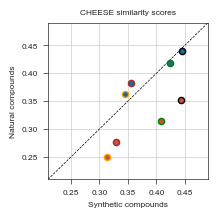

In [89]:
df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]

fig, axs = stylia.create_figure(1,1, width=TWO_COLUMNS_WIDTH*0.3, height=TWO_COLUMNS_WIDTH*0.3)

ax = axs.next()

statistic = "median"

df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]
df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
df_ena_syn = df_syn[df_syn["database"] == "enamine-real"]
df_ena_nat = df_nat[df_nat["database"] == "enamine-real"]

from stylia.colors.colors import NamedColors

named_colors = NamedColors()

database_colors = {"zinc15": named_colors.blue, "enamine-real": named_colors.red}
search_type_colors = {"consensus": "black", "morgan": "green", "espsim_shape": "orange", "espsim_electrostatic": "brown"}

ax.plot([0, 1], [0,1], color="black", linestyle="--")

categories = ["synthetic", "natural"]
databases = ["zinc15", "enamine-real"]
search_types = ["consensus", "morgan", "espsim_shape", "espsim_electrostatic"]
for s in search_types:
    for d in databases:
        db = df[df["database"] == d]
        db = db[db["search_type"] == s]
        dx = db[db["category"] == categories[0]]
        dy = db[db["category"] == categories[1]]
        ax.scatter(dx[statistic], dy[statistic], color=database_colors[d], edgecolors = search_type_colors[s], zorder=1000, s=20)
        #ax.plot([dx["median"], dx["median"]], [dy["perc_25"], dy["perc_75"]], color=search_type_colors[s])
        #ax.plot([dx["perc_25"], dx["perc_75"]], [dy["median"], dy["median"]], color=search_type_colors[s])

edgecolors = ["black", "green", "orange", "brown"]
print(df_ena_nat)

ax.set_xlim(0.21, 0.49)
ax.set_ylim(0.21, 0.49)
stylia.label(ax, title = "CHEESE similarity scores", xlabel = "Synthetic compounds", ylabel = "Natural compounds")
stylia.save_figure("../figures/f2_a.png")

In [90]:
df = pd.read_csv("../results/cheese_popular_hits.csv")

df[df["database"] == "enamine-real"]

,smiles,inchikey,consensus_hits,consensus_syn_hits,consensus_nat_hits,consensus_score,consensus_syn_score,consensus_nat_score,database
355,COC1=CC(/C=C/C2=CC=C(O)C(OC)=C2)=CC=C1O,KQPXJFAYGYIGRU-ONEGZZNKSA-N,18,0,18,11.334831,0.000000,11.334831,enamine-real
356,COc1cc(/C=C/c2ccc(O)c(OC)c2)ccc1O,KQPXJFAYGYIGRU-ONEGZZNKSA-N,18,0,18,11.334831,0.000000,11.334831,enamine-real
414,Cc1cncc(C(=O)Oc2ccc(Cl)cc2)c1,YZSUXLLRXCIBPH-UHFFFAOYSA-N,17,17,0,7.100476,7.100476,0.000000,enamine-real
415,CC1=CN=CC(C(=O)OC2=CC=C(Cl)C=C2)=C1,YZSUXLLRXCIBPH-UHFFFAOYSA-N,17,17,0,7.100476,7.100476,0.000000,enamine-real
446,COC1=CC(NC(=O)/C=C/C2=CC=C(O)C(O)=C2)=CC=C1O,VLAIUMJTYQEOIV-XVNBXDOJSA-N,16,0,16,9.433561,0.000000,9.433561,enamine-real
...,...,...,...,...,...,...,...,...,...
84935,CC1=CNC(CC(N)=O)=C1C(=O)N1C[C@@H](CO)[C@H](C2=...,ISGYSFRBPWCXHC-GJZGRUSLSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84936,CC1=NC2=CC(C)=NN2C(C(=O)NCC2(C)CC(F)(F)CN2C(=O...,SSUAISVWFHICPR-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84937,C#CCCC(=O)NCC1(C)CC(F)(F)CN1C(=O)C1=NN(C(C)C)C=N1,GHWZDSKKWHEZKT-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84938,CC1=CNC(CC(N)=O)=C1C(=O)N[C@@H]1C[C@@H](C)CN(C...,STVHRCUPYVIGJH-TZMCWYRMSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real


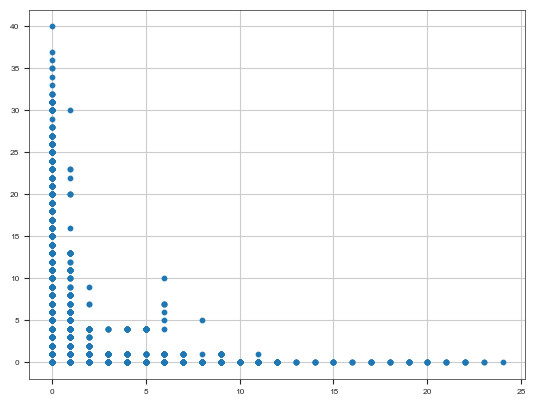

In [91]:
plt.scatter(df["consensus_syn_hits"], df["consensus_nat_hits"])